## AUTHOR: IVY NJERI NJOROGE

## OVERVIEW <br>

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I must then translate my findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## OBJECTIVES

The main objective of this project is to identify the kind of movies Microsoft should start making in their new movie studio. I achieved this by identifying the most profitable movie genres among other things which I've otlined below.

## Questions to answer

1. Which genre is the best performing?<br>
2. How much money do you need to spend to make a high earning movie? Does the money spent in production influence the profits realized?<br>
3. What is the optimum length of a movie?<br>
4. When is the best time of year to release a movie?


## DATA DESCRIPTION<br>

Datasets used in this project were extracted from the following sites:<br>

1. Box Office Mojo<br>
2. IMDB<br>
3. Rotten Tomatoes<br>
4. TheMovieDB<br>
5. The Numbers<br>
<br>
Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that I opened using pd.read_csv, while the data from IMDB is located in a SQLite database.

## Importing Libraries, Datasets and Python Packages

In [1]:
# import the data file
import zippedData

In [2]:
# import libraries
import numpy as np
import pandas as pd
import sqlite3


import csv

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I checked my directory so as to access the folder with the datasets I need for this project.

In [3]:
cd zippedData

C:\Users\shale\Documents\Moringa_Course_Material\Phase_1\dsc-phase-1-project-v2-4\zippedData


In [4]:
# list all files in zipped data
! ls

Budget vs Revenue.png
bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [5]:
# open IMDb file
conn = sqlite3.connect('im.db/im.db')

In [6]:
movie_basics = pd.read_sql_query("""
SELECT *
FROM movie_basics
;
""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
movie_ratings = pd.read_sql_query("""
SELECT *
FROM movie_ratings
;
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


I went ahead to open all csv files. These include:<br>
    1. bom.movie_gross.csv.gz<br>
    2. tmdb.movies.csv.gz<br>
    3. tn.movie_budgets.csv.gz

In [8]:
# reading the first dataset
pd.read_csv('bom.movie_gross.csv.gz')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
# reading the second dataset
pd.read_csv('tmdb.movies.csv.gz')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
# reading the third dataset
pd.read_csv('tn.movie_budgets.csv.gz')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Open the following tsv files:<br>
    1. rt.movie_info.tsv.gz<br>
    2. rt.reviews.tsv.gz

In [11]:
# reading the fourth dataset
pd.read_table('rt.movie_info.tsv.gz')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [12]:
# reading and encoding the fifth dataset
pd.read_table('rt.reviews.tsv.gz', encoding='windows-1254')

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


I then assigned each dataset a variable name

In [13]:
# reading the datasets into a dataframe
df_gross = pd.read_csv('bom.movie_gross.csv.gz')
df_movies = pd.read_csv('tmdb.movies.csv.gz')
df_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
df_movieinfo = pd.read_table('rt.movie_info.tsv.gz')
df_reviews = pd.read_table('rt.reviews.tsv.gz', encoding='windows-1254')

## ACCESSING INFORMATION AND CLEANING DATA<br>
In this section, I am finding out more information about the datasets, including whether or not they have null values, duplicates, etc.

## (a) Movie Gross Dataset (df_gross)

In [14]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


This shows that the data set has 3 data types: objects, floats and integers. The foreign_gross column should have 'float' datatype instead of 'object'. I made the conversion to avoid any distortion within my analysis.

In [15]:
# removing object in the foreign_gross column
df_gross['foreign_gross'] = [float(str(x).replace(',', '')) for x in df_gross['foreign_gross']]

In [16]:
# checking new df_gross
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [17]:
df_gross.shape

(3387, 5)

This shows that the dataset has 3387 rows and 5 columns

In [18]:
# previewing the data
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [19]:
# checking for null values
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [20]:
# checking percentage of null values
df_gross.isnull().sum()*100/len(df_gross)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [21]:
# the percentage of missing values is too small so we can drop the 
# null values 
df_gross.dropna(axis = 0, inplace = True)

In [22]:
# confirming the missing values were dropped
df_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
# checking for duplicates
df_gross.duplicated().sum()

0

## (b) Movie Info Dataset (df_movieinfo)

In [24]:
df_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


This shows that the data set has 2 data types: objects and integers.

In [25]:
df_movieinfo.shape

(1560, 12)

This shows that the dataset has 1560 rows and 7 columns

In [26]:
# previewing the data
df_movieinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
df_movieinfo.isnull().sum()*100/len(df_movieinfo)

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

The studio column has a significant amount of missing values but can't be dropped as I shall use it to merge datasets later. Therefore, I shall use the fillna() method to replace those values in the original DataFrame instead.

In [28]:
df_movieinfo['studio'].fillna('Unknown', inplace = True)
df_movieinfo

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,Unknown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,Unknown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,Unknown
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,Unknown
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,Unknown


At this point, I dropped all the unnecessary columns.

In [29]:
# dropping unnecessary columns
df_movieinfo.drop(['synopsis', 'theater_date', 'dvd_date', 'currency', 'box_office', 'director', 'writer'], axis = 1, inplace = True)

In [30]:
df_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1560 non-null   int64 
 1   rating   1557 non-null   object
 2   genre    1552 non-null   object
 3   runtime  1530 non-null   object
 4   studio   1560 non-null   object
dtypes: int64(1), object(4)
memory usage: 61.1+ KB


In [31]:
# checking for null values
df_movieinfo.isnull().sum()

id          0
rating      3
genre       8
runtime    30
studio      0
dtype: int64

In [32]:
# checking for the percentage of null values
df_movieinfo.isnull().sum()*100/len(df_movieinfo)

id         0.000000
rating     0.192308
genre      0.512821
runtime    1.923077
studio     0.000000
dtype: float64

The percentage of missing values in the rating, genre and runtime columns are close to negligible. However, to avoid any potential errors, I opted to replace those values in the original DataFrame instead using the fillna() method.

In [33]:
df_movieinfo['rating'].fillna('Unknown', inplace = True)

In [34]:
df_movieinfo['genre'].fillna('Unknown', inplace = True)

In [35]:
df_movieinfo['runtime'].fillna('Unknown', inplace = True)

In [36]:
df_movieinfo

,id,rating,genre,runtime,studio
0,1,R,Action and Adventure|Classics|Drama,104 minutes,Unknown
1,3,R,Drama|Science Fiction and Fantasy,108 minutes,Entertainment One
2,5,R,Drama|Musical and Performing Arts,116 minutes,Unknown
3,6,R,Drama|Mystery and Suspense,128 minutes,Unknown
4,7,NR,Drama|Romance,200 minutes,Unknown
...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,106 minutes,New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,88 minutes,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes,Unknown
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101 minutes,Unknown


## (c) Movie Budgets Dataset (df_budgets)

In [37]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This shows that the data set has 2 data types: objects and integers.

In [38]:
# previewing the data
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Remove '$' symbol and ',' from production_budget, domestic_gross and worlwide_gross. This will convert these columns from the object datatype to integers making them usable in our data analysis.

In [39]:
# removing '$' and ','
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$','')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$','')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',', '')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace('$','')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].str.replace(',', '')

In [40]:
# converting object columns to integral columns
df_budgets['production_budget'] = df_budgets['production_budget'].astype('int64')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype('int64')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype('int64')

In [41]:
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [42]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [43]:
# checking for null values
df_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset has zero null values.

In [44]:
# checking for duplicates
df_budgets.duplicated().sum()

0

In [45]:
# checking lowest grossing movies
df_budgets.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5037,38,"Apr 23, 2019",Living Dark: The Story of Ted the Caver,1750000,0,0
3975,76,"May 15, 2015",Pound of Flesh,7500000,0,0
4627,28,"Jun 28, 2011",2:13,3500000,0,0
4628,29,"Jan 29, 2013","Batman: The Dark Knight Returns, Part 2",3500000,0,0
3947,48,"Jun 21, 2019",Burn Your Maps,8000000,0,0
...,...,...,...,...,...,...
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395


The data above shows that some movies lack domestic and worldwide gross. This will distort my analysis hence affecting my findings. I therefore decided to drop those rows.

In [46]:
# dropping rows without domestic and worldwide gross
gross_drop = df_budgets[(df_budgets['domestic_gross'] == 0) & (df_budgets['worldwide_gross'] == 0)]
gross_drop

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


In [47]:
df_budgets.drop(gross_drop.index, axis=0, inplace=True)
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


## MERGING DATASETS<br>
Merging datasets is the process of bringing two datasets together into one, and aligning the rows based on common attributes or columns. In this case, df_gross and df_movieinfo share a common column "studio". I merged the 2 datasets into one (df_mydata) then merged that with df_budgets. However, in the latter case, the shared attribute had a different column name so I renamed one to match the other. This will be explored when merging the last datasets.

In [48]:
# merging the first datasets
df_mydata = pd.merge(df_gross, df_movieinfo, how = 'inner', left_on = 'studio', right_on = 'studio')
df_mydata

,title,studio,domestic_gross,foreign_gross,year,id,rating,genre,runtime
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
1,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
2,Clash of the Titans (2010),WB,163200000.0,330000000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
3,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
4,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
...,...,...,...,...,...,...,...,...,...
360,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91 minutes
361,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91 minutes
362,It Comes At Night,A24,14000000.0,5300000.0,2017,1399,R,Drama|Horror,91 minutes
363,Hereditary,A24,44100000.0,35300000.0,2018,1399,R,Drama|Horror,91 minutes


In [49]:
# checking for null values
df_mydata.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
id                0
rating            0
genre             0
runtime           0
dtype: int64

In [50]:
# checking for duplicates
df_mydata.duplicated().sum()

0

In order to merge the df_budgets to df_mydata, a column is identified in the dataframes with the same data but different names. One column name can be renamed to match the other before merging. In this case, the 'movie' column will be renamed to 'title'.

In [51]:
# renaming the movie column to title
df_budgets.rename(columns={'movie':'title'}, inplace = True)

In [52]:
# merging the datasets
finaldata = pd.merge(df_budgets, df_mydata, how = 'inner', left_on = 'title', right_on = 'title')
finaldata

,id_x,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,id_y,rating,genre,runtime
0,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,229000000.0,428900000.0,2017,611,R,Drama|Mystery and Suspense,137 minutes
1,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,WB,448100000.0,636800000.0,2012,611,R,Drama|Mystery and Suspense,137 minutes
2,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,WB,330400000.0,543300000.0,2016,611,R,Drama|Mystery and Suspense,137 minutes
3,29,"Jun 14, 2013",Man of Steel,225000000,291045518,667999518,WB,291000000.0,377000000.0,2013,611,R,Drama|Mystery and Suspense,137 minutes
4,55,"May 23, 2014",X-Men: Days of Future Past,200000000,233921534,747862775,Fox,233900000.0,513900000.0,2014,102,PG-13,Drama|Mystery and Suspense,101 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,36,"Jan 15, 2010",Fish Tank,3000000,374675,5922292,IFC,375000.0,2000000.0,2010,925,NR,Comedy|Drama,80 minutes
246,20,"Aug 28, 2015",We Are Your Friends,2000000,3591417,10153415,WB,3600000.0,7500000.0,2015,611,R,Drama|Mystery and Suspense,137 minutes
247,41,"Nov 28, 2014",The Babadook,2000000,950792,7482387,IFC,964000.0,9300000.0,2014,925,NR,Comedy|Drama,80 minutes
248,18,"May 25, 2012",Chernobyl Diaries,1000000,18119640,42411721,WB,18100000.0,19000000.0,2012,611,R,Drama|Mystery and Suspense,137 minutes


I now have 3 merged datasets to form a complete dataframe.<br>
However, the above dataframe contains domestic_gross_x and domestic_gross_y columns. I opted to drop domestic_gross_y to avoid duplication.

In [53]:
# dropping domestic_y column
finaldata.drop(['domestic_gross_y'], axis = 1, inplace = True)

In [54]:
finaldata

,id_x,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,year,id_y,rating,genre,runtime
0,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,WB,428900000.0,2017,611,R,Drama|Mystery and Suspense,137 minutes
1,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,WB,636800000.0,2012,611,R,Drama|Mystery and Suspense,137 minutes
2,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,WB,543300000.0,2016,611,R,Drama|Mystery and Suspense,137 minutes
3,29,"Jun 14, 2013",Man of Steel,225000000,291045518,667999518,WB,377000000.0,2013,611,R,Drama|Mystery and Suspense,137 minutes
4,55,"May 23, 2014",X-Men: Days of Future Past,200000000,233921534,747862775,Fox,513900000.0,2014,102,PG-13,Drama|Mystery and Suspense,101 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,36,"Jan 15, 2010",Fish Tank,3000000,374675,5922292,IFC,2000000.0,2010,925,NR,Comedy|Drama,80 minutes
246,20,"Aug 28, 2015",We Are Your Friends,2000000,3591417,10153415,WB,7500000.0,2015,611,R,Drama|Mystery and Suspense,137 minutes
247,41,"Nov 28, 2014",The Babadook,2000000,950792,7482387,IFC,9300000.0,2014,925,NR,Comedy|Drama,80 minutes
248,18,"May 25, 2012",Chernobyl Diaries,1000000,18119640,42411721,WB,19000000.0,2012,611,R,Drama|Mystery and Suspense,137 minutes


In [55]:
# checking for null values
finaldata.isnull().sum()

id_x                 0
release_date         0
title                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
studio               0
foreign_gross        0
year                 0
id_y                 0
rating               0
genre                0
runtime              0
dtype: int64

In [56]:
# checking for duplicates
finaldata.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS (EDA)
In this section, I will answer ALL the questions listed on my objectives. There are bits and pieces of data cleaning processes that I included whenever I encountered an error/blocker.

## *QUESTION 1*<br>
Which genre is the best performing?<br>
To answer this question, I first established the value count of each genre then compared the worldwide gross to each genre.

In [57]:
# getting value counts for genre column
finaldata['genre'].value_counts()

Drama|Mystery and Suspense                                              210
Comedy|Drama                                                             17
Drama|Horror                                                             11
Action and Adventure|Drama                                                2
Drama                                                                     2
Drama|Horror|Mystery and Suspense                                         2
Action and Adventure|Mystery and Suspense                                 2
Drama|Romance                                                             2
Art House and International|Comedy|Drama|Musical and Performing Arts      2
Name: genre, dtype: int64

The Drama|Mystery and Suspense category is the leading category with more than 200 counts. This is displayed by the barplot below.

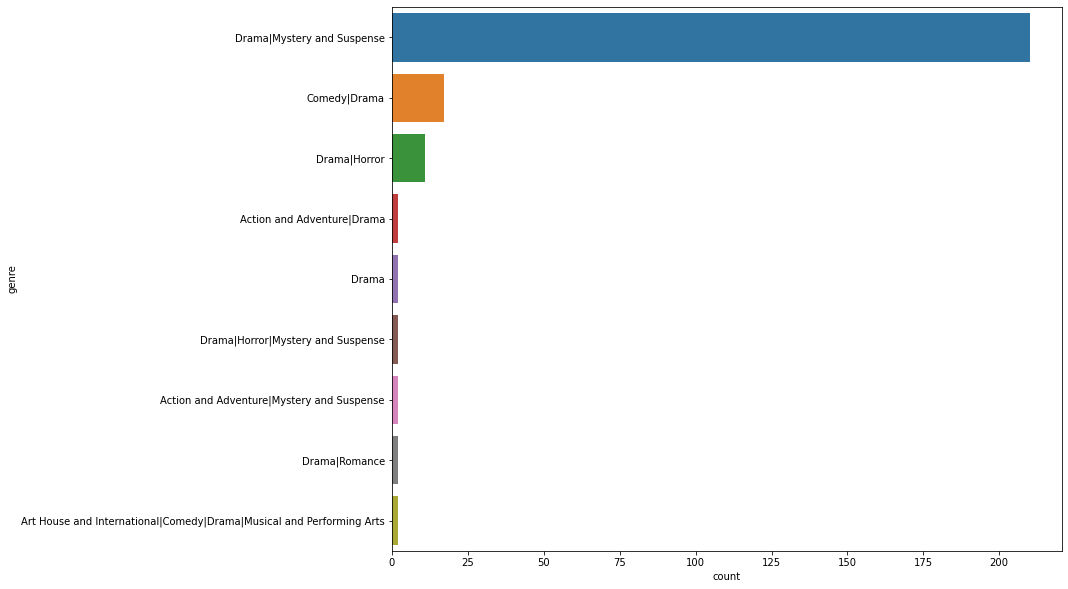

In [58]:
plt.figure(figsize = (12,10))
sns.countplot(y = 'genre', data = finaldata, order = finaldata['genre'].value_counts().index)
plt.show()

The leading genre is Drama|Mystery and Suspense.

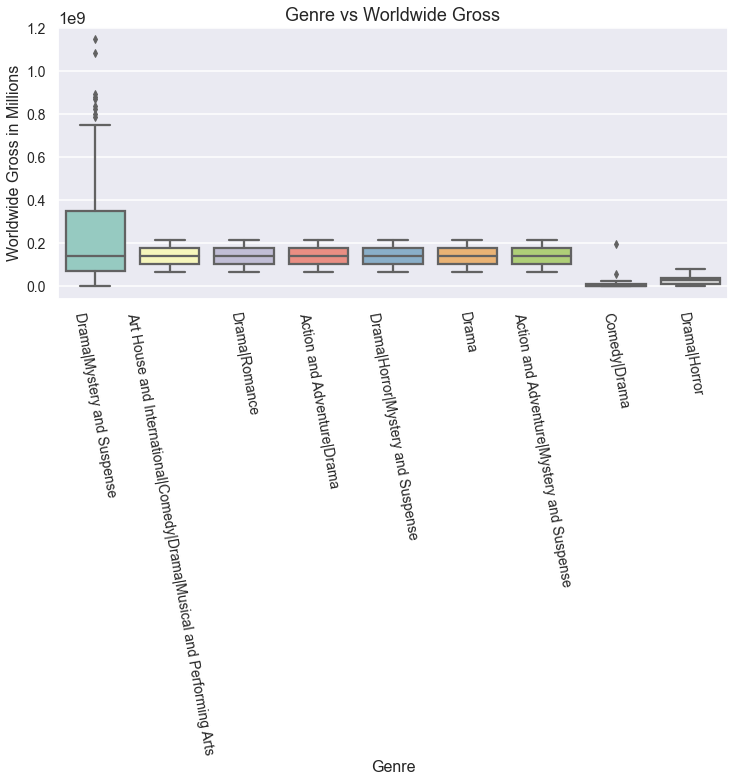

In [59]:
# generating box plot of worldwide gross statistics per genre
plt.figure(figsize = (12,5))
sns.set_style('darkgrid')
sns.set_context('talk')
sns.boxplot(x = 'genre', y = 'worldwide_gross', data = finaldata, palette = 'Set3')
# naming the axes and plot title
plt.ylabel('Worldwide Gross in Millions', fontsize = 16)
plt.xlabel('Genre', fontsize = 16)
plt.title('Genre vs Worldwide Gross', fontsize = 18)
# setting axes ticks
plt.xticks(rotation = -80, fontsize = 14)
plt.yticks(fontsize = 14);

While there are outliers, the Drama|Mystery and Suspense category took the lead with an upper quartile of 380 million. Outliers in this genre have made more than 1 billion.

## QUESTION 2<br>
How much money do you need to spend to make a high earning movie?
To answer this question, I compared the production budgets to the domestic gross from each movie?

Text(0, 0.5, 'Revenue in Millions')

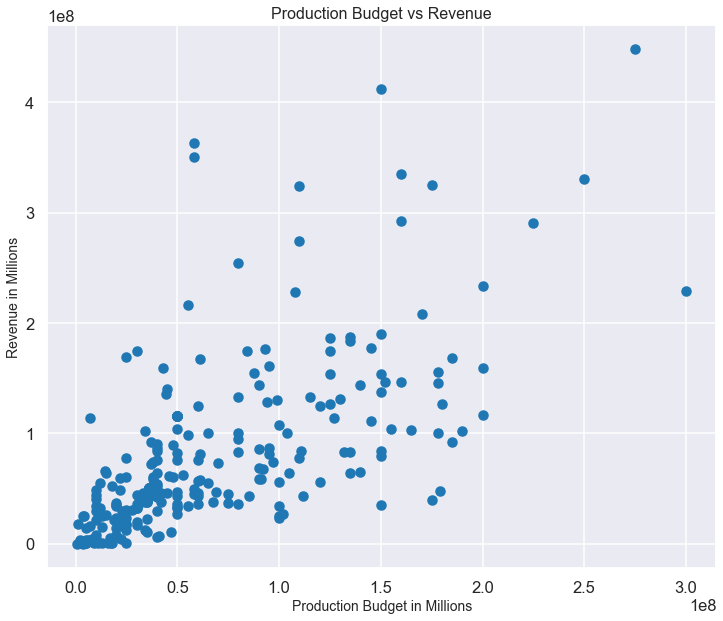

In [60]:
# comparing production budget with revenue

fig, ax= plt.subplots(figsize=(12,10))

x = finaldata['production_budget']
y = finaldata['domestic_gross_x']

ax.scatter(x,y)
# naming the axes and plot title
ax.set_title('Production Budget vs Revenue', fontsize=16)
ax.set_xlabel("Production Budget in Millions",fontsize=14)
ax.set_ylabel("Revenue in Millions", fontsize=14)

A general outlook of the above visualization shows that an increase in production budget leads to an increase in revenue. While outliers exist, the introduction of a regression line (as shown below) gives an exact feel of the general increase in movie gross as the budget increases.

(0.0, 300000000.0)

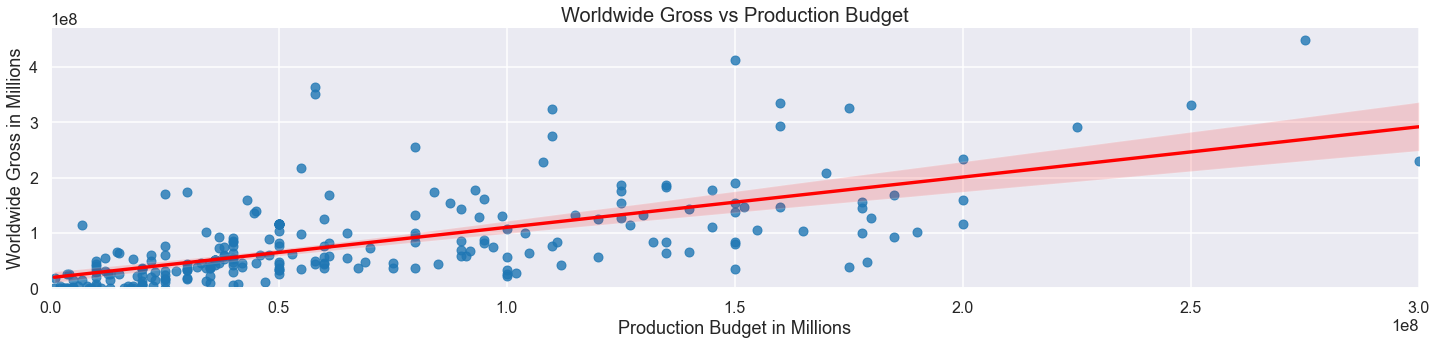

In [61]:
sns.lmplot(x = 'production_budget', y = 'domestic_gross_x', data = finaldata, aspect = 4, line_kws = {'color': 'red'})
# naming the axes and plot title
plt.title('Worldwide Gross vs Production Budget', fontsize = 20)
plt.xlabel('Production Budget in Millions', fontsize = 18)
plt.ylabel('Worldwide Gross in Millions', fontsize = 18)
# setting the axes tick values and limits
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(0,None)
plt.xlim(0, None)

A movie with a production budget of 150 million could make the same in worldwide gross, if not more. However, a movie with a budget of 50 million can only make the same 50 million in worldwide gross.

## *QUESTION 3*<br>
What is the optimum length of a movie?<br>
To answer this question, I first converted the runtime objects to floats. I then compared the runtime column to the foreign gross column

In [62]:
# removing object in the foreign_gross column
finaldata['runtime'] = [float(str(x).replace('minutes', '')) for x in finaldata['runtime']]

Text(0.5, 0, 'Runtime')

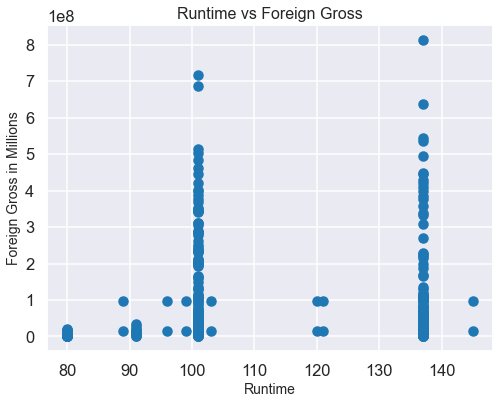

In [63]:
fig, ax= plt.subplots(figsize=(8,6))

x = finaldata['runtime']
y = finaldata['foreign_gross']

ax.scatter(x,y)
# naming the axes and plot title
ax.set_title('Runtime vs Foreign Gross', fontsize=16)
ax.set_ylabel("Foreign Gross in Millions", fontsize=14)
ax.set_xlabel("Runtime",fontsize=14)

The above diagram shows that the popular runtimes are 101 minutes and 137 minutes.

(79.0, 145.0)

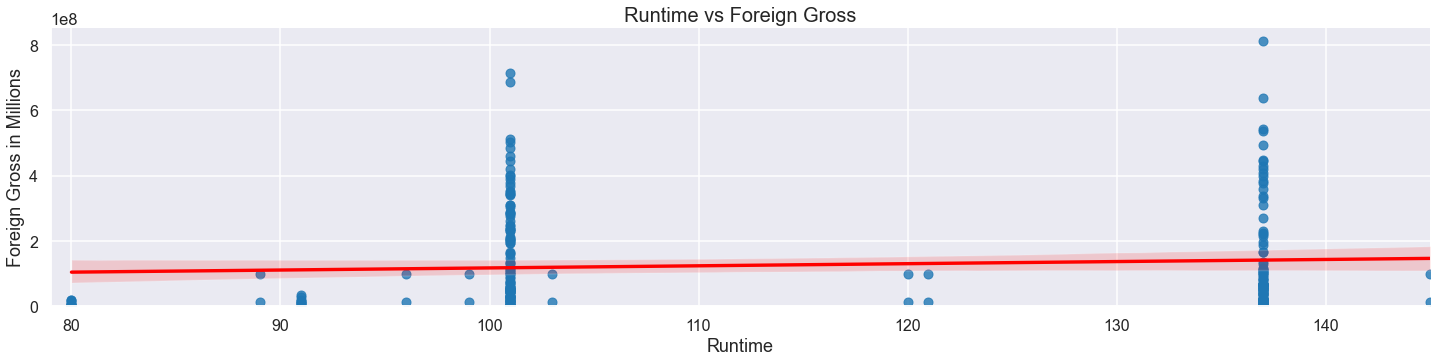

In [64]:
sns.lmplot(x = 'runtime', y = 'foreign_gross', data = finaldata, aspect = 4, line_kws = {'color': 'red'})
# naming the axes and plot title
plt.title('Runtime vs Foreign Gross', fontsize = 20)
plt.xlabel('Runtime', fontsize = 18)
plt.ylabel('Foreign Gross in Millions', fontsize = 18)
# setting the axes tick values and limits
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(0,None)
plt.xlim(79, None)

With the introduction of a regression line, we can see that the movies with a longer runtime have a slightly higher foreign gross. For instance, those with a runtime of 101 minutes have the potential to garner a foreign gross of approximately 700 million while those that have 137 minutes could garner approximately 800 million.

## *QUESTION 4*<br>
When is the best time of year to release a movie?<br>
To answer this question, I had to first convert the datatype of release date to a datetime object so as to extract the month.

In [65]:
# importing the datetime module
import datetime
#change datatype of release date to a datetime object
finaldata['release_date'] = pd.to_datetime\
                    (finaldata['release_date'])

In [66]:
# checking value counts and confirming change of format
finaldata['release_date'].value_counts()

2018-11-21    7
2010-03-26    7
2017-05-19    3
2017-12-22    2
2015-09-18    2
             ..
2010-11-24    1
2017-12-01    1
2012-05-18    1
2006-11-03    1
2018-12-21    1
Name: release_date, Length: 208, dtype: int64

In [67]:
#create month column so we can plot it against profit
finaldata['release_month'] = \
        pd.DatetimeIndex(finaldata['release_date']).month

In [68]:
# confirming creation of month column
finaldata

,id_x,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,year,id_y,rating,genre,runtime,release_month
0,9,2017-11-17,Justice League,300000000,229024295,655945209,WB,428900000.0,2017,611,R,Drama|Mystery and Suspense,137.0,11
1,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,WB,636800000.0,2012,611,R,Drama|Mystery and Suspense,137.0,7
2,18,2016-03-25,Batman v Superman: Dawn of Justice,250000000,330360194,867500281,WB,543300000.0,2016,611,R,Drama|Mystery and Suspense,137.0,3
3,29,2013-06-14,Man of Steel,225000000,291045518,667999518,WB,377000000.0,2013,611,R,Drama|Mystery and Suspense,137.0,6
4,55,2014-05-23,X-Men: Days of Future Past,200000000,233921534,747862775,Fox,513900000.0,2014,102,PG-13,Drama|Mystery and Suspense,101.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,36,2010-01-15,Fish Tank,3000000,374675,5922292,IFC,2000000.0,2010,925,NR,Comedy|Drama,80.0,1
246,20,2015-08-28,We Are Your Friends,2000000,3591417,10153415,WB,7500000.0,2015,611,R,Drama|Mystery and Suspense,137.0,8
247,41,2014-11-28,The Babadook,2000000,950792,7482387,IFC,9300000.0,2014,925,NR,Comedy|Drama,80.0,11
248,18,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,WB,19000000.0,2012,611,R,Drama|Mystery and Suspense,137.0,5


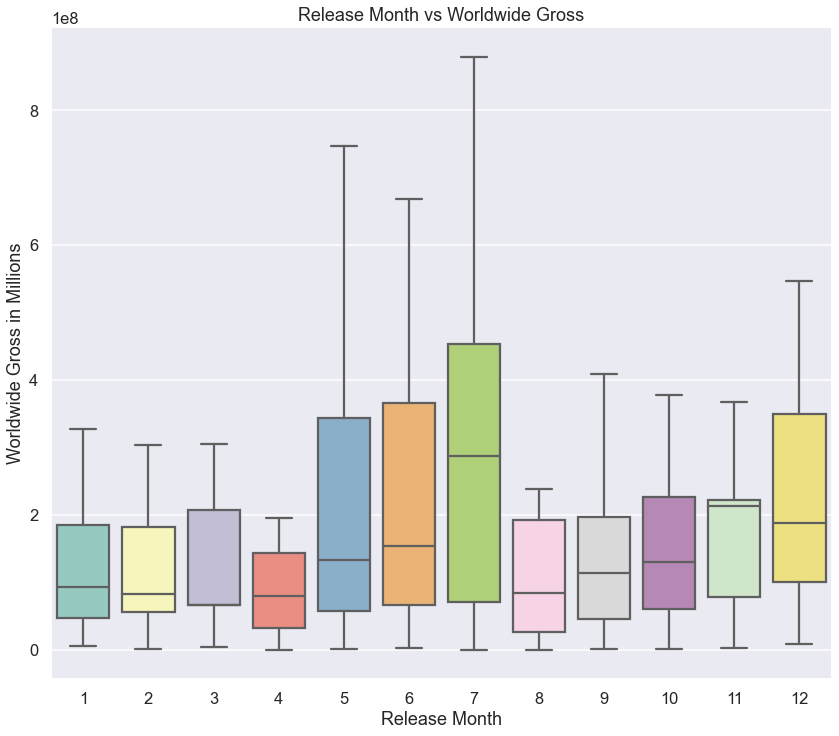

In [69]:
# creating a boxplot using release month and worldwide gross
f, ax = plt.subplots(figsize=(14,12))
sns.set_style('darkgrid')
sns.set_context('talk')
sns.boxplot(x = 'release_month', y = 'worldwide_gross', data = finaldata, palette = 'Set3', showfliers = False)
# naming the axes and plot title
plt.title('Release Month vs Worldwide Gross')
plt.ylabel('Worldwide Gross in Millions')
plt.xlabel('Release Month') 
plt.show()

The above diagram omits outliers but clearly depicts the month of July as the best time of year to release a movie. July has an upper quartile of 450 million, a median of 300 million and a lower quartile of 100 million. Months like January have an upper quartile of 200 million, which is half that of July.<br> 
The other months to consider would be May, June, and December.<br>
The following diagram displays the same but with outliers.

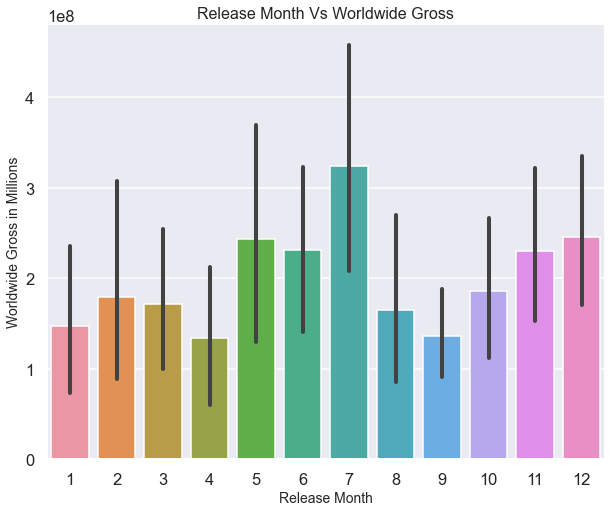

In [70]:
fig, ax = plt.subplots(figsize=(10,8))

x = finaldata['release_month']
y = finaldata['worldwide_gross']

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Release Month Vs Worldwide Gross', fontsize=16)
ax.set_xlabel("Release Month",fontsize=14)
ax.set_ylabel("Worldwide Gross in Millions", fontsize=14);

## CONCLUSION AND RECOMMENDATIONS

My findings have shown that the more funds a studio invests in their movie production, the more money they are likely to receive as a result. Though there are some outliers, the majority of high-grossing movies for these particular types of movies are ones with higher budgets.Microsoft should therefore invest a lot of money in the production of movies. My analysis also shows that the optimal time to release a movie is in the month of July. Movies released in May, June, July and December also grossed higher compared to other months. The runtime I would recommend would be 137 minutes. I would also definitely recommend producing movies in the Drama|Mystery and Suspense genre as they grossed highest by a relatively higher margin.<br>
<br>
If the recommendations that I made are put to use, I am confident that Microsoft will have a successful break. In the future, this analysis could be improved by adding additional data as it becomes available. Taxes should also be considered as a factor affecting revenue.

## REFERENCES

https://towardsdatascience.com/python-pandas-tricks-3-best-methods-4a909843f5bc#:~:text=merge()%20automatically%20detects%20the,this%20results%20into%20inner%20join.<br>
https://pynative.com/python-datetime-format-strftime/<br>
https://www.activestate.com/resources/quick-reads/how-to-access-a-column-in-a-dataframe-using-pandas/#:~:text=You%20can%20use%20the%20loc,Let's%20see%20how.&text=If%20we%20wanted%20to%20access,in%20order%20to%20retrieve%20it.<br>
https://stackoverflow.com/questions/40315878/a-convenient-way-to-plot-bar-plot-in-python-pandas<br>
https://www.geeksforgeeks.org/seaborn-style-and-color/